# 01_EXPLORE - Galaxy morphology dataset
**Date:** 07-09-2025

**Goals:** Inspect galaxy zoo 2 dataset, show label distribution, sample images and captions, quality check, and verify for leakage before training.

In [4]:
# imports
import os
import random
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
from pathlib import Path

sns.set(style='whitegrid')

random.seed(5629)
np.random.seed(5629)
try:
    PROJECT_ROOT = Path(__file__).resolve().parents[2]
except NameError:
    PROJECT_ROOT = Path.cwd().resolve().parent
DATA_PATH = PROJECT_ROOT / "data" / "labels"
labels_filepath = DATA_PATH / "labels_manifest_1000.csv"
thumbnails_directory = DATA_PATH / "thumbs"

manifest_labels_fp = PROJECT_ROOT / "data" / "processed" / "manifest_with_labels.csv"


This section presents the inspection of the dataset for issues, as well as exploration of its structure and contents of it.

Let's start by getting familiar with the data. Here is a list of all the columns:

In [5]:
df = pd.read_csv(labels_filepath)
dfm = pd.read_csv(manifest_labels_fp)
print("Rows in full dataset: \n", dfm.shape[0])
print("Columns in full dataset: \n", dfm.columns.tolist())
print("Rows in sample: \n", df.shape[0])
print("Columns in sample: \n", df.columns.tolist())
print("Manifest head:\n")
dfm.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\79263\\galaxy_morphology_ml_captioning\\data\\processed\\manifest_with_labels.csv'

In [3]:
print("Sample head:\n")
df.head()

Sample head:



,objid,sample,asset_id,dr7objid,gz2_class,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,...,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar,derived_label,filepath_laptop,filepath_PC
0,587739505552785605,original,130549,587739505552785605,Sc?t,38.0,158.0,0.711,0.730,0.463,...,130549,587739505552785605,0.765982,0.463,0.000000,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
1,587732578312454276,original,57314,587732578312454276,SBc4t,38.0,131.0,0.842,0.842,0.027,...,57314,587732578312454276,0.929180,0.027,0.000000,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
2,587729154670395609,original,29846,587729154670395609,Sb?m,39.0,138.0,0.692,0.692,0.188,...,29846,587729154670395609,0.701607,0.188,0.000000,0.076080,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
3,587732154179452963,original,52897,587732154179452963,SBb2m,30.0,237.0,0.033,0.033,0.000,...,52897,587732154179452963,0.999264,0.000,0.000000,0.034358,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...
4,587722983364690145,original,1129,587722983364690145,Sc?m,35.0,122.0,0.714,0.727,0.108,...,1129,587722983364690145,0.856707,0.108,0.016388,0.000000,0.0,spiral,C:\Users\79263\galaxy_morphology_ml_captioning...,C:\Users\user\PycharmProjects\galaxy_morpholog...


Both the manifest and the sample contain **93** columns. Every object's id (**objid**), sample from which it was taken (original or extra), a couple more ids, the class of the object using the galaxy zoo classification, the total votes that the object received, and a long list of features: criteria that people were voting upon, and the fraction of the voters that recognized every given feature in the image. In the end, are the calculated scores for every class: **score_spiral, smooth, edge, merger and bar**. It is a number between 0 and 1 representing how prominent every feature is. The derived_label column then combines all the features using logic to determine the label of the image: **spiral**, **elliptical**, **edge-on**, **merger** or **ambiguous** if a consensus was not met within the voters. **Filepath** is, well, the filepath (from project root [before that I worked with hardcoded windows paths, but dropped them for reproducibility reasons]).

In [4]:
print("FULL DATASET:\n")
print("Basic information about the columns:\n")
display(dfm.info())
print("\nAmount of missing values in each column:\n")
display(dfm.isna().sum().sort_values(ascending=False))

print("\nSAMPLE:\n")
print("Basic information about the columns:\n")
display(df.info())
print("\nAmount of missing values in each column:\n")
display(df.isna().sum().sort_values(ascending=False))

FULL DATASET:

Basic information about the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239572 entries, 0 to 239571
Data columns (total 93 columns):
 #   Column                                                         Non-Null Count   Dtype  
---  ------                                                         --------------   -----  
 0   objid                                                          239572 non-null  int64  
 1   sample                                                         239572 non-null  object 
 2   asset_id                                                       239572 non-null  int64  
 3   dr7objid                                                       239572 non-null  int64  
 4   gz2_class                                                      239572 non-null  object 
 5   total_classifications                                          239572 non-null  float64
 6   total_votes                                                    239572 non-null  float64

None


Amount of missing values in each column:



t02_edgeon_a05_no_debiased                   294
t04_spiral_a09_no_spiral_debiased            288
t03_bar_a07_no_bar_debiased                  280
t06_odd_a14_yes_debiased                     276
t07_rounded_a16_completely_round_debiased    240
                                            ... 
score_merger                                   0
score_bar                                      0
derived_label                                  0
filepath_PC                                    0
filepath_laptop                                0
Length: 93, dtype: int64


SAMPLE:

Basic information about the columns:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 93 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   objid                                                          1000 non-null   int64  
 1   sample                                                         1000 non-null   object 
 2   asset_id                                                       1000 non-null   int64  
 3   dr7objid                                                       1000 non-null   int64  
 4   gz2_class                                                      1000 non-null   object 
 5   total_classifications                                          1000 non-null   float64
 6   total_votes                                                    1000 non-null   float64
 7   t01_smooth_or

None


Amount of missing values in each column:



t02_edgeon_a05_no_debiased                   1
t03_bar_a07_no_bar_debiased                  1
t04_spiral_a09_no_spiral_debiased            1
t07_rounded_a16_completely_round_debiased    1
sample                                       0
                                            ..
score_merger                                 0
score_bar                                    0
derived_label                                0
filepath_laptop                              0
filepath_PC                                  0
Length: 93, dtype: int64

As can be seen, only **4** columns from **93** in the sample contain one missing value, which is not a problem, because we are going to drop them anyway. They all come from one entry: entry 476, so I were to use the columns it would be wiser to drop that row.

However, in the full dataset there are **9** columns with missing values, ranging from 11 to 294 values missing. It contributes to ~13% of all columns, and at most 1% of the rows.
Importantly, there were **122** entries missing a filepath. The easiest approach would be to entirely discard all of them.

Now, let's check all the entries to be unique (assert that there are no duplicates):

In [5]:
print("Unique object ids (sample):\n")
display(df.nunique())
print("\nUnique object ids (full dataset):\n")
display(dfm.nunique())

Unique object ids (sample):



objid              1000
sample                3
asset_id           1000
dr7objid           1000
gz2_class           128
                   ... 
score_merger        395
score_bar             1
derived_label         4
filepath_laptop    1000
filepath_PC        1000
Length: 93, dtype: int64


Unique object ids (full dataset):



objid              239572
sample                  3
asset_id           239572
dr7objid           239572
gz2_class             818
                    ...  
score_merger        70855
score_bar               1
derived_label           5
filepath_PC        239572
filepath_laptop    239572
Length: 93, dtype: int64

Therefore, all the ids of the dataset and the sample are unique and are ready to be used!

Let's explore the labels' distribution.
After looking at the label column, it looks like most galaxies are spiral, with less elliptical ones, and edge-on were rare. Only a few were ambiguous.
In the sample, we included equal parts (25% each) of all the categories, except for ambiguous.
Here are all the labels and their distribution:

FULL

derived_label
spiral        118947
elliptical     68725
ambiguous      35111
edge-on        16115
merger           674
Name: count, dtype: int64


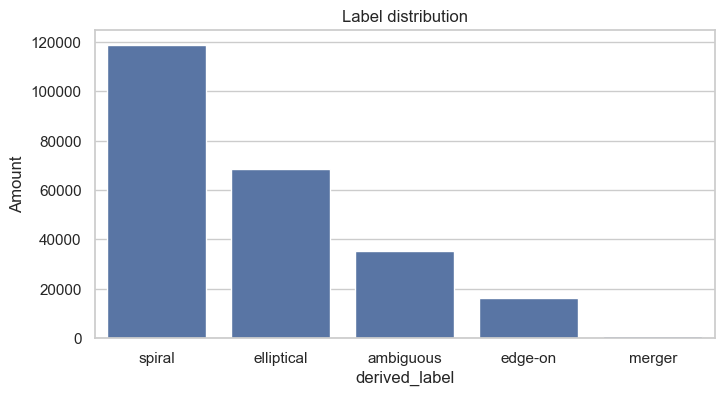


SAMPLE

derived_label
spiral        250
elliptical    250
edge-on       250
merger        250
Name: count, dtype: int64


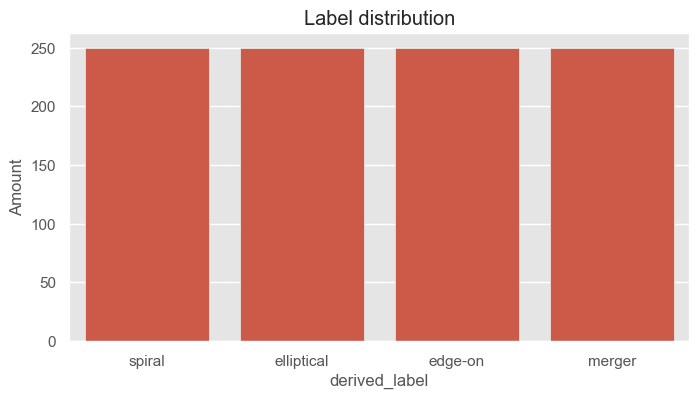

In [6]:
print("FULL\n")
print(dfm['derived_label'].value_counts())
plt.figure(figsize = (8,4))
sns.barplot(x=dfm['derived_label'].value_counts().index, y=dfm['derived_label'].value_counts().values)
plt.ylabel('Amount')
plt.title('Label distribution')
plt.style.use('ggplot')
plt.show()

print("\nSAMPLE\n")
print(df['derived_label'].value_counts())
plt.figure(figsize = (8,4))
sns.barplot(x=df['derived_label'].value_counts().index, y=df['derived_label'].value_counts().values)
plt.ylabel('Amount')
plt.title('Label distribution')
plt.show()

Indeed, almost half of entries were classified as spiral, a quarter were elliptical, and there were much less ambiguous and edge-on ones. Merger galaxies, surprisingly, had only 674 entries (~0.3%).

A couple of random images with labels:



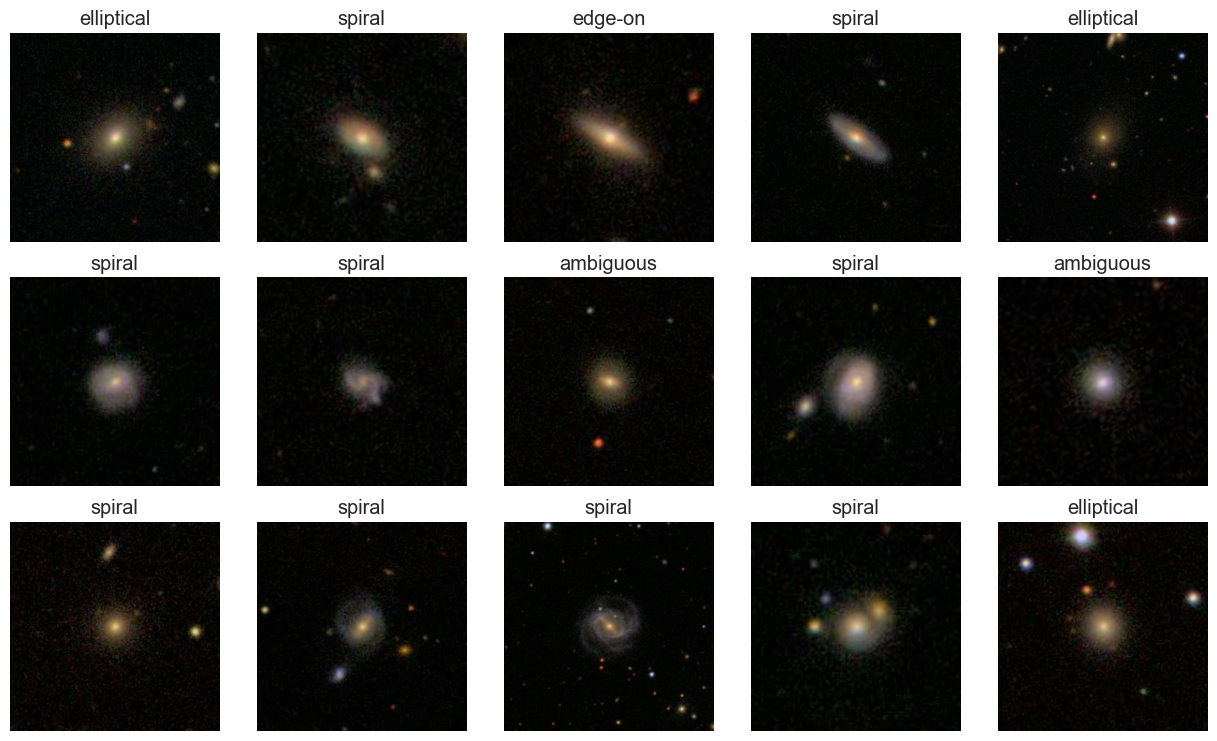

Examples of each class:



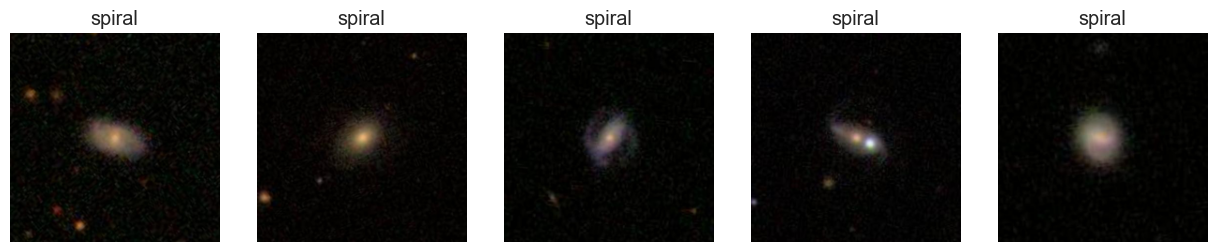

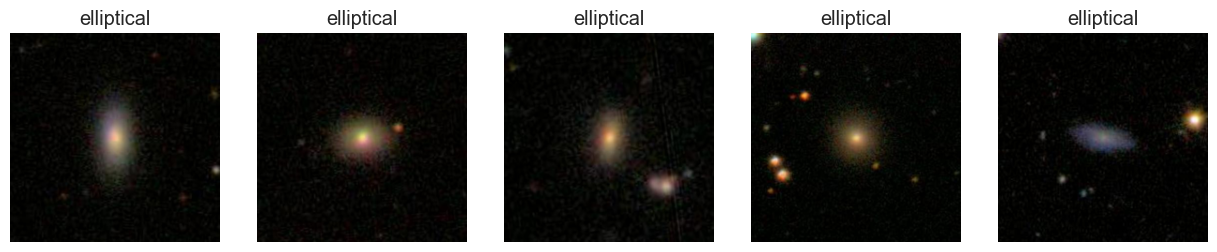

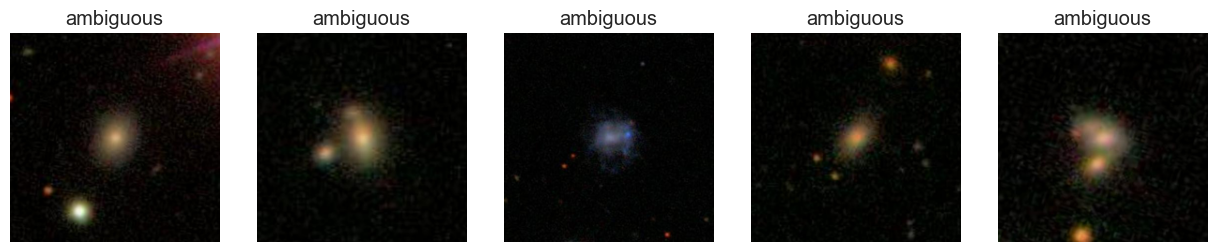

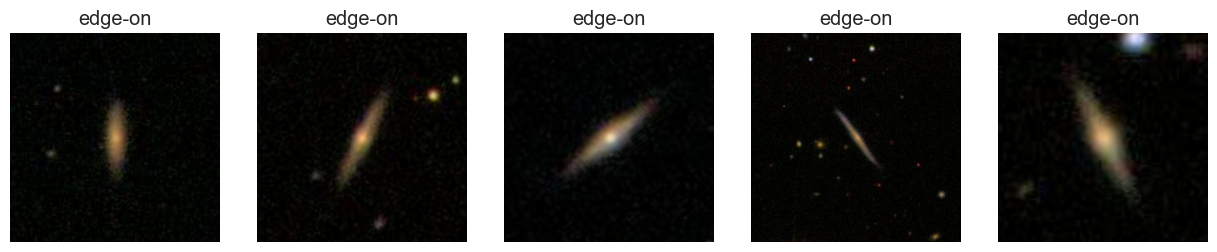

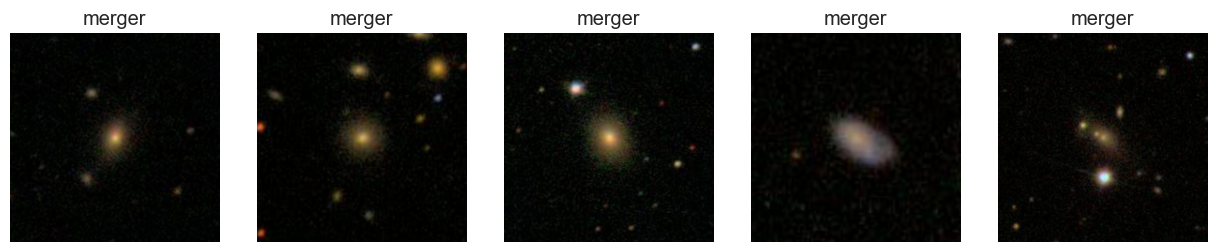

In [7]:
#[partially AI-generated function]
def show_images(rows=3, cols=5, label=None):
    chosen = dfm if label is None else dfm[dfm['derived_label']==label]
    chosen = chosen.sample(min(len(chosen), rows*cols), random_state=5629)
    fig, axs = plt.subplots(rows, cols, figsize=(cols*2.5, rows*2.5))
    axs = axs.ravel()
    for ax, (_, row) in zip(axs, chosen.iterrows()):
        img = Image.open(str(PROJECT_ROOT / ['filepath'])).convert('RGB').resize((224,224))
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(str(row['derived_label'])[:20])
    plt.tight_layout()
    plt.show()
print("A couple of random images with labels:\n")
show_images()
print("Examples of each class:\n")
show_images(rows=1, label=dfm['derived_label'].value_counts().index[0])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[1])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[2])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[3])
show_images(rows=1, label=dfm['derived_label'].value_counts().index[4])

The galaxies in the sample are very varied and have distinct features. All the thumbnails are 224 by 224 pixels, 3 color channels. Artifacts can be rarely seen: chromatic aberration, gravitational lensing. Additionally, the objects are very rarely alone in the photos: this could negatively impact training. However, if the noise and out of place objects are evenly distributed, the models may learn to ignore it.

## **Captions**

As for the captions, captions_sample.csv contains generated captions for every class. Most were automatically generated, and a few were written by hand by me.
For more detailed information about caption generation, see notebook 03_baselines. Now, let's focus on the statistical evidence.

In [6]:
captions_filepath = DATA_PATH / "captions" / "captions_sample.csv"
dfc = pd.read_csv(captions_filepath)
print("Here are some random captions:\n")
for c in dfc['caption'].dropna().sample(min(10, dfc['caption'].dropna().shape[0]), random_state=5629):
    print("-", c)
print("Here is the average caption length:")
print(sum(dfc['caption'].dropna().map(len).tolist())/len(dfc['caption'].dropna()))

SyntaxError: unexpected character after line continuation character (1549929143.py, line 1)

Let's look at the numeric features in the dataset:

FULL SET:

Total numeric columns: 88


,objid,asset_id,dr7objid,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,...,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar
count,2.395720e+05,239572.000000,2.395720e+05,239572.00000,239572.000000,239572.000000,239572.000000,239572.000000,239572.000000,239572.000000,...,239572.000000,239572.000000,239572.000000,239572.000000,2.395720e+05,239572.000000,239572.000000,239572.000000,239572.000000,239572.0
mean,5.878182e+17,141803.619705,5.878182e+17,42.57144,179.063179,0.639451,0.645667,0.398052,0.320455,0.323738,...,0.025181,0.262434,0.250498,141803.619705,5.878182e+17,0.498210,0.398052,0.138184,0.052607,0.0
std,1.827193e+14,81498.732113,1.827193e+14,5.85539,60.704100,0.284807,0.288147,0.346483,0.292026,0.295747,...,0.121987,0.363506,0.356530,81498.732113,1.827193e+14,0.455918,0.346483,0.279829,0.143892,0.0
min,5.877230e+17,3.000000,5.877230e+17,16.00000,45.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,3.000000,5.877230e+17,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.877327e+17,71608.750000,5.877327e+17,39.00000,140.000000,0.455000,0.459000,0.040000,0.091000,0.091000,...,0.000000,0.000000,0.000000,71608.750000,5.877327e+17,0.000000,0.040000,0.000000,0.000000,0.0
50%,5.877393e+17,140253.500000,5.877393e+17,43.00000,156.000000,0.760000,0.768000,0.326000,0.190000,0.193000,...,0.000000,0.000000,0.000000,140253.500000,5.877393e+17,0.583000,0.326000,0.000000,0.000000,0.0
75%,5.877429e+17,212400.250000,5.877429e+17,46.00000,196.000000,0.863000,0.872000,0.776000,0.511000,0.514000,...,0.000000,0.500000,0.434358,212400.250000,5.877429e+17,0.989070,0.776000,0.091544,0.009202,0.0
max,5.888489e+17,295304.000000,5.888489e+17,79.00000,604.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,295304.000000,5.888489e+17,1.000000,1.000000,1.000000,1.000000,0.0


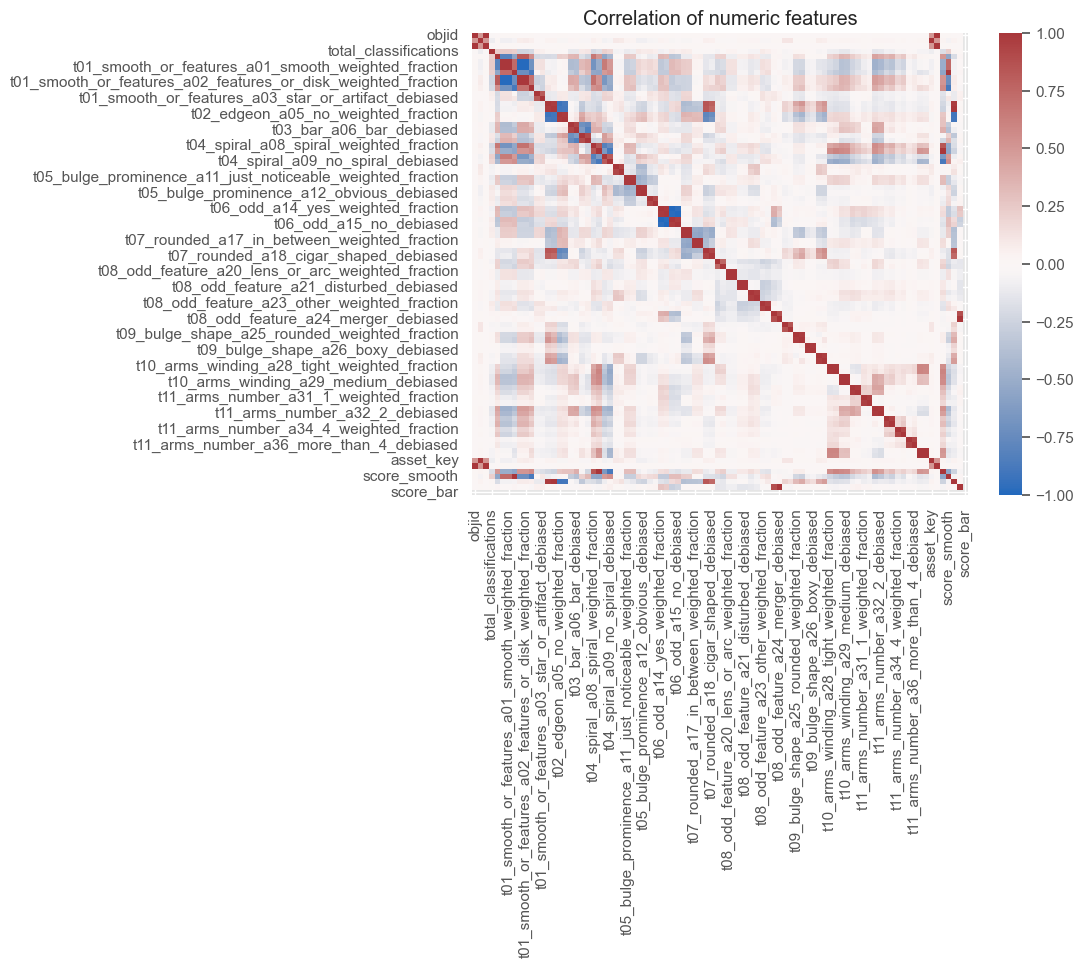


SAMPLE:

Total numeric columns: 88


,objid,asset_id,dr7objid,total_classifications,total_votes,t01_smooth_or_features_a01_smooth_fraction,t01_smooth_or_features_a01_smooth_weighted_fraction,t01_smooth_or_features_a01_smooth_debiased,t01_smooth_or_features_a02_features_or_disk_fraction,t01_smooth_or_features_a02_features_or_disk_weighted_fraction,...,t11_arms_number_a36_more_than_4_debiased,t11_arms_number_a37_cant_tell_weighted_fraction,t11_arms_number_a37_cant_tell_debiased,asset_key,objid_key,score_spiral,score_smooth,score_edge,score_merger,score_bar
count,1.000000e+03,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.0
mean,5.878114e+17,140454.676000,5.878114e+17,42.822000,168.478000,0.645814,0.652545,0.391635,0.310799,0.313714,...,0.01433,0.170842,0.165161,140454.676000,5.878114e+17,0.278923,0.391635,0.291180,0.241103,0.0
std,1.790412e+14,82977.365892,1.790412e+14,5.532352,50.373058,0.259084,0.262113,0.322136,0.266019,0.269635,...,0.09882,0.330331,0.325130,82977.365892,1.790412e+14,0.403659,0.322136,0.397370,0.354203,0.0
min,5.877230e+17,68.000000,5.877230e+17,22.000000,81.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,68.000000,5.877230e+17,0.000000,0.000000,0.000000,0.000000,0.0
25%,5.877327e+17,71215.500000,5.877327e+17,40.000000,137.750000,0.500000,0.506250,0.081000,0.098000,0.098750,...,0.00000,0.000000,0.000000,71215.500000,5.877327e+17,0.000000,0.081000,0.000000,0.000000,0.0
50%,5.877391e+17,136708.500000,5.877391e+17,43.000000,154.000000,0.732000,0.739000,0.339000,0.216000,0.214000,...,0.00000,0.000000,0.000000,136708.500000,5.877391e+17,0.000000,0.339000,0.016316,0.000000,0.0
75%,5.877426e+17,215987.750000,5.877426e+17,46.000000,182.000000,0.848000,0.857000,0.743000,0.472750,0.477000,...,0.00000,0.119750,0.112365,215987.750000,5.877426e+17,0.594429,0.743000,0.707104,0.608947,0.0
max,5.888489e+17,295148.000000,5.888489e+17,73.000000,448.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,1.000000,295148.000000,5.888489e+17,1.000000,1.000000,1.000000,1.000000,0.0


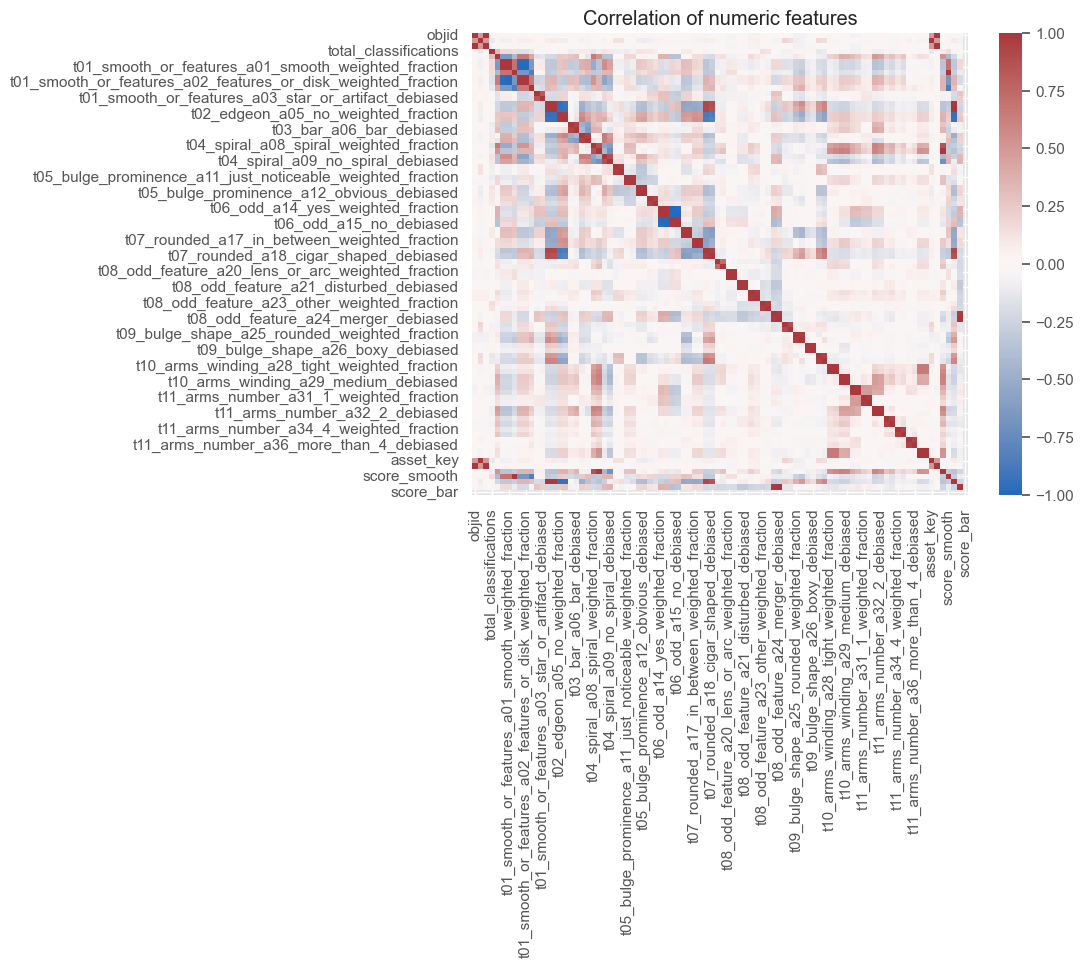

In [10]:
print("FULL SET:\n")
num_cols_listm = dfm.select_dtypes(['int64', 'float64']).columns.tolist()
print("Total numeric columns:", len(num_cols_listm))
display(dfm[num_cols_listm].describe())
plt.figure(figsize=(8,6))
sns.heatmap(dfm[num_cols_listm].corr(), fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation of numeric features')
plt.show()

print("\nSAMPLE:\n")
num_cols_list = df.select_dtypes(['int64', 'float64']).columns.tolist()
print("Total numeric columns:", len(num_cols_list))
display(df[num_cols_list].describe())
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols_list].corr(), fmt=".2f", cmap='vlag', center=0)
plt.title('Correlation of numeric features')
plt.show()

Analyzing the heatmap, almost no features show sophisticated correlation, meaning that none of the columns of the dataset are redundant.

Additionally, the average values in both datasets are really close, meaning that the sample is a good representative of the entire thing.

Now, a check for corrupted images:

In [11]:
issues_m = []
for _, r in dfm.iterrows():
    path = None
    if pd.notna(r['filepath']):
        path = r['filepath']
    if path is None or not os.path.exists(path):
        issues_m.append(r.get('objid'))
print("Missing or non-existent paths in full dataset:", len(issues_m))
print(issues_m)
issues = []
for _, r in df.iterrows():
    path = r['filepath']
    if path is None or not os.path.exists(path):
        issues.append((r.get('id',None), path))
print("Missing or non-existent paths in sample:", len(issues))
print(issues)

Missing or non-existent paths in full dataset: 0
[]
Missing or non-existent paths in sample: 0
[]


No corrupted images were found (in the sample)!

Initially, the 122 missing filepaths in the full dataset still existed.

## Previously:

Missing or non-existent paths in full dataset: 122

[587722982290620479, 587725471205490852, 587725471205556327, 587725471205556424, 587725577498591551, 587726014554636629, 587726014554702078, 587728906098180287, 587728906098180522, 587728931332948214, 587728931333013972, 587729157907939465, 587729386061561998, 587729386061627642, 587729386061627701, 587729781467316737, 587732053773910272, 587732701259694189, 587732701259759718, 587732701259759740, 587735348573896849, 587736479207391416, 587736543625150556, 587736619329651020, 587736900376526998, 587736900376527023, 587736945742381151, 587736945742381457, 588007004198863224, 588010878770020490, 588010878770020496, 588010879306170542, 588010879306170548, 588010879306235941, 588010879306235980, 588010879306236089, 588010879306301459, 588013382718259801, 588013382718324989, 588013382718325277, 588013382718325328, 588013382721142962, 588013382721208796, 588017627783299332, 588017627783299340, 588017627783364868, 588017702952960310, 588017704562852063, 588017710975156345, 588017724394111043, 588017726012588264, 588848899389456487, 588848899389456617, 588848899389522032, 587726100416692571, 587729158434062487, 587729387686068315, 587732484904124593, 587732701259628661, 588017702952894724, 588017726012653729, 588848899389456658, 587730846353261027, 587730846354965290, 587730846886724500, 587730847427985641, 587730847962039063, 587730848498975509, 587730848501072107, 587731173307384385, 587731173843731297, 587731174917669027, 587731174918980260, 587731185114087993, 587731185114088161, 587731185114088316, 587731185129291992, 587731185649910175, 587731185658888420, 587731185669374122, 587731186192744693, 587731186192744702, 587731186192810164, 587731186194055543, 587731186209718282, 587731187275923677, 587731187804995856, 587731187810893999, 587731187810894085, 587731187810894087, 587731512070176839, 587731512070177108, 587731512611438744, 587731512620220559, 587731513145688256, 587731513151914131, 587731513151914161, 587731513690816599, 587731514229850204, 587734304341426500, 587734304877052080, 587734305413333309, 587734305413333343, 587734305414381601, 587734305419362425, 587734305956167817, 588015507664535599, 588015507665125409, 588015507674955940, 588015507674955948, 588015507674955959, 588015507679805636, 588015508189479460, 588015508736114702, 588015508757151905, 588015509287862526, 588015509812347028, 588015509812347075, 588015509825650890, 588015509825716307, 588015509825716346, 588015510342008936]

Missing or non-existent paths in sample: 0
[]

I dropped them with a command, so now there are no missing filepaths.



In the following steps (preprocessing), I will split the dataset into training (70%) and validation (20%) split, and also leave a small fraction (10%) for posterior evaluation. For the baseline model, the input will consist of images-only. Later I plan on adding column data to see the difference.

## Summary

What can be inferred from the dataset:
- Dataset size: 1000
- Label classes: spiral, elliptical, edge-on, merger, ambiguous
- No major quality issues found
- preprocessing lies ahead